## layout
* libraries
* 1. plot expect
* 1-1. plot expect (group mean) - average participant and session
* 1-2. plot participant facet grid
* 2. plot actual
* 2-1. plot actual (group mean)
* 2-2. plot participant facet grid


### plan
* grab the first point in the trajectory data (960, 707)
* reverse the datapoints
* grab the last point in the trajectory data and loop through every trial
* convert the origin (960, 707) to (0,0) - which will give you an updated coordinate
* using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point

--

* count number of data points that fall in the origin
* clean data that is within r of 150
* if there is negative theta, convert it to 0 

--

* load data
* add subject number
* extract relevant columns
* concat data, axis 0
* average degree

# libraries & functions

## library

In [1]:

%matplotlib inline

import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import loggamma
from scipy.stats import johnsonsu
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.stats import frechet_l
from scipy.special import gamma as gammaf
import warnings
import scipy.stats as st
import statsmodels as sm
import seaborn as sns
import glob

In [2]:
large = 40; med = 22; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': 30,
          'xtick.labelsize': 14,
          'ytick.labelsize': med,
          #'xtick.direction': ,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

## functions

In [3]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

In [174]:
def subject_wise_mean(data, groupby_subject, groupby_IV, DV, groupby_IV_dict, replace_dict, figure_title):
    data['newr'] = 1;    area = 150 * data['newr']**2
    data['numeric_IV'] = data[groupby_IV].map(replace_dict)
    new_data = data.groupby(['numeric_IV',groupby_subject]).mean().reset_index()

    fig = plt.figure(figsize=(10, 10));ax = fig.add_subplot(projection='polar');
    ax.set_thetamin(0);ax.set_thetamax(180)
    groups = new_data.groupby('numeric_IV')
    for name, group in groups:
#         print(group)
        ax.scatter(group[DV], group.newr*groupby_IV_dict[name],
                   label=name, alpha=0.20, s=area, marker='o',cmap='hsv')
    ax.legend()
    #ax.set_xlim(ax.get_xlim()[::-1])

    plt.text(0.5,0.8, figure_title,
             horizontalalignment='center',
             fontsize=15,
             transform = ax.transAxes)

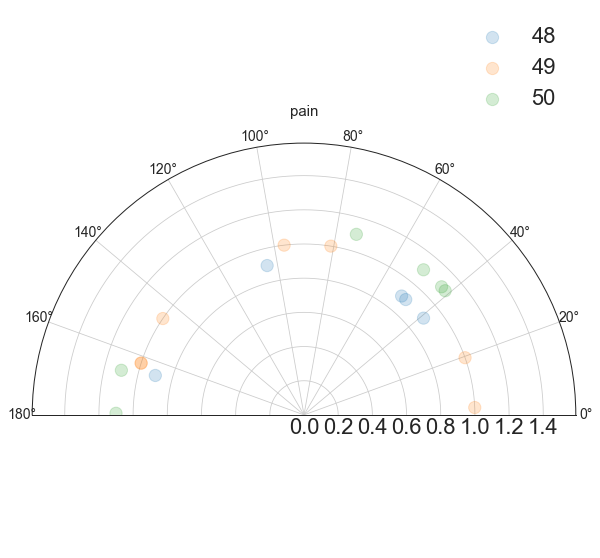

In [175]:
level_r = {50: 1.1, 49:1.0, 48: 0.9}
level_value = {"high_stim": 48, "med_stim":49, "low_stim": 50}

subject_wise_mean(data = p_result, 
                  groupby_subject = 'src_subject_id', 
                  groupby_IV = 'param_stimulus_type', 
                  DV = 'event02_expect_angle', 
                  groupby_IV_dict = level_r, 
                  replace_dict = level_value, 
                  figure_title = "pain")



In [244]:
mu, sigma = 0, 0.1 
all_task.shape[0]
np.random.normal(mu, sigma, all_task.shape[0]).tolist()

[0.0009051304099111436,
 0.00636033724168832,
 -0.08825680343158408,
 -0.05466955626385764,
 0.18586392877317987,
 -0.10058974423136657,
 -0.021371278830867545,
 -0.15037952254414091,
 0.08984967723326855,
 -0.17840960442455192,
 -0.015637540536674824,
 -0.042419093164131116,
 0.0924501312615264,
 0.07138146513802897,
 -0.10038980568352547,
 0.035193422465570626,
 -0.20849407215320676,
 0.028604247032288324,
 0.02099812913327365,
 0.033178334066397204,
 0.13261883946043765,
 0.01763336266239528,
 -0.1425935036901108,
 -0.19012753944660682,
 0.0742543090611374,
 -0.03336493816304945,
 0.12321324420770832,
 0.01800700581231157,
 0.13022793773356908,
 0.10276412157499303,
 0.05343409727104253,
 -0.05643882463288008,
 -0.059411718358230274,
 -0.11417804307679441,
 -0.017614897401948205,
 0.06413354583961653,
 0.02091274048716038,
 -0.0464164068894994,
 -0.11831344988918893,
 0.11218066228559498,
 0.04428022141531461,
 -0.28920503111230983,
 -0.07390809417266857,
 -0.10143967658849831,
 0.0

In [288]:
#df = pd.melt(p_result, id_vars=['plateau', 'temperature'], var_name='actual_theta_pi', value_name='actual_theta_pi')
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.set(xmargin=0.05, ymargin=0.15)
    ax.set_thetamin(0);ax.set_thetamax(180)
    my_list = [ 0, 3,  11, 29,69, 96, 180]
    my_new_list = [i * np.pi/180 for i in my_list]
    ax.set_xticks(my_new_list)
    ax.tick_params(direction='out', length=20, width=2, colors='k', pad = 12,
               grid_color='k', grid_alpha=0.5, labelrotation = 30, labelbottom = True)
   
    ax.set_xticklabels(['No Sensation', 
                        'Barely Detectable', 'Weak', 
                        'Moderate', 'Strong', 'Very Strong', 
                        'Strongest Imaginable'])
    ax.title.set_position([.5, 0.9])
    ax.set_xlim(ax.get_xlim()[::-1])

    
def facet_subject_wise_mean(data, task, groupby_subject, groupby_IV, 
                            DV, groupby_IV_dict, replace_dict, figure_title):
#     mu, sigma = 0, 0.1 # mean and standard deviation
#     data['jitter'] = np.random.normal(mu, sigma, data.shape[0]).tolist()
    
    data['numeric_IV'] = data[groupby_IV].map(level_value)
    new_data = data.groupby([task, groupby_subject,'numeric_IV']).mean().reset_index()
#     data['jitter_DV'] = data[DV] + data.jitter
    new_data['newr'] = 1
    area = 200 * new_data['newr']**2
    new_data.newr = new_data['numeric_IV'].replace(groupby_IV_dict)
    orders = ['low stim', 'med stim', 'high stim']
    #data[DV] = data[DV] + np.random.randn(m)*sigma

    g = sns.FacetGrid(new_data,  col = task,hue='numeric_IV', palette = "rocket_r", #hue_kws=d,          
                      subplot_kws=dict(projection='polar'), size=9, #hue_order=orders,
                      sharex=False, sharey=False, despine=False, )#, margin_titles=True)


    g.map(plt.scatter, DV, "newr",  s = area,       alpha = 0.75)
    #g.map(sns.despine())


    g.map_dataframe(annotate)

    g.set(ylim=(0, 1.6))
    g.set(ylabel = None)
    g.set(yticklabels=[]) 


    g.set_titles( col_template="task: {col_name}")

    handles = g._legend_data.values()
    labels = g._legend_data.keys()
    g.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=7)


    g.fig.suptitle(figure_title)
    g.fig.tight_layout()
    plt.show()


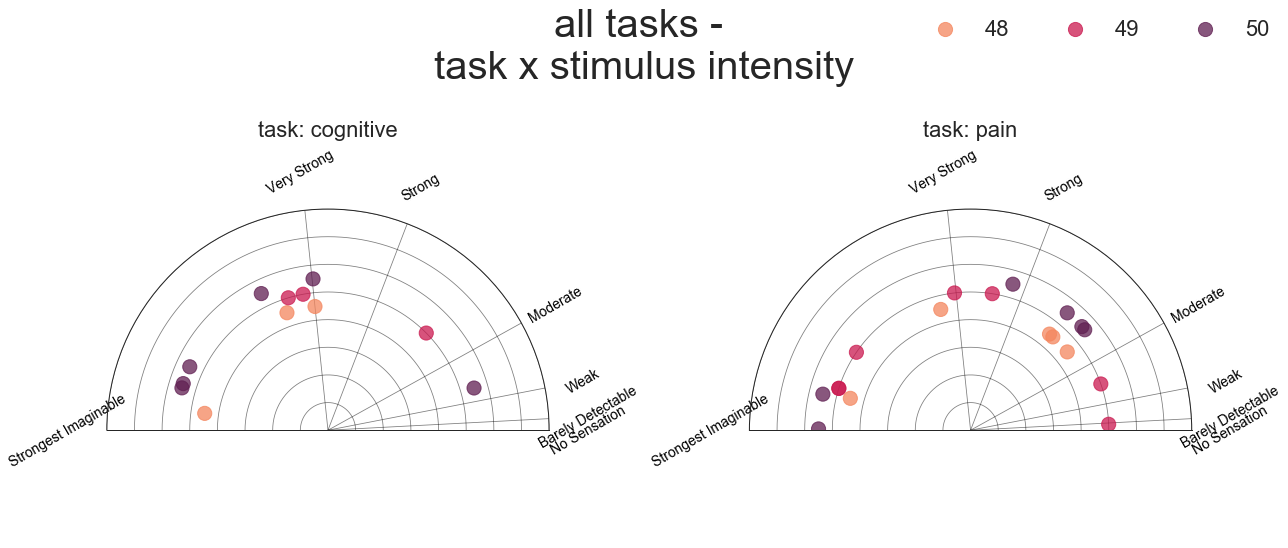

In [289]:
level_r = {50: 1.1, 49:1.0, 48: 0.9}
level_value = {"high_stim": 48, "med_stim":49, "low_stim": 50}

facet_subject_wise_mean(all_task, 
                        'param_task_name', 
                        groupby_subject = 'src_subject_id', 
                        groupby_IV = 'param_stimulus_type',
                        DV = 'event02_expect_angle', 
                        groupby_IV_dict = level_r, 
                        replace_dict = level_value,
                        figure_title = 'all tasks - \ntask x stimulus intensity')


In [4]:
origin_x = 960
origin_y = 707

# parameter

In [5]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'

# Expectation ratings

## load data - all three task

In [299]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'

df = pd.DataFrame()
all_task = pd.DataFrame()

fix_file_list = []
for ind,sub in enumerate(sublist):
    files =  glob.glob(os.path.join(main_dir,'sub-{:04d}'.format(sub),'ses-*','*_beh.csv'))
    fix_file_list.append(files)
flat_list = [item for sub_list in fix_file_list for item in sub_list]

for file in flat_list:
    df = pd.read_csv(file)
    all_task = pd.concat([all_task, df], axis = 0, sort = True)

In [298]:
all_task.param_task_name.unique()

array(['pain', nan, 'cognitive'], dtype=object)

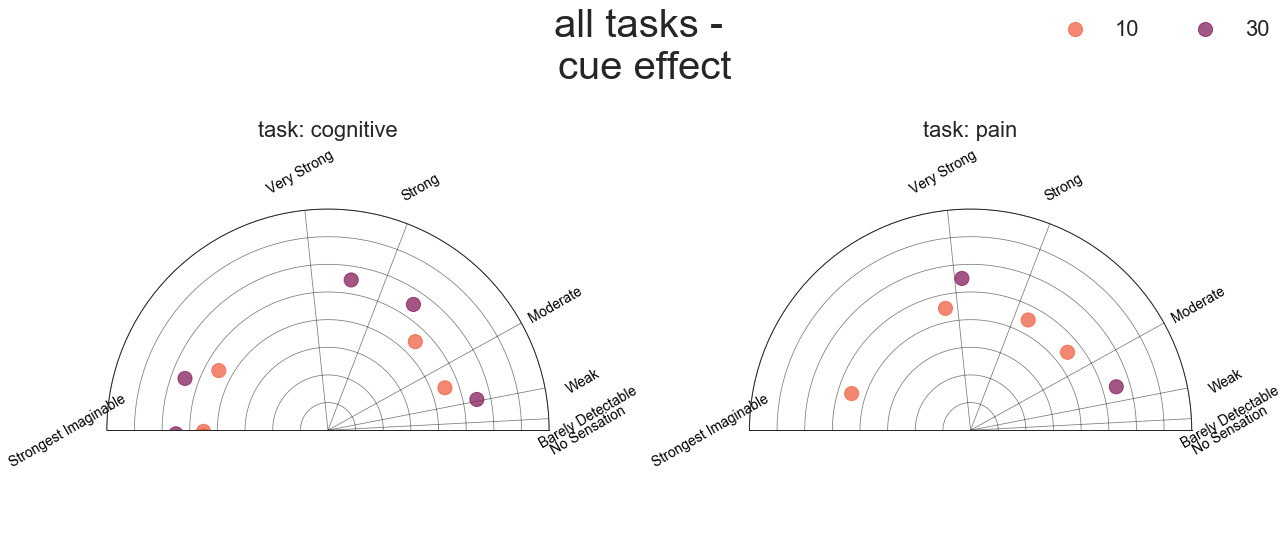

In [294]:
level_r = {30: 1.1, 10:0.9}
level_value = {"high_cue": 30, "low_cue":10}

facet_subject_wise_mean(all_task, 
                        'param_task_name', 
                        groupby_subject = 'src_subject_id', 
                        groupby_IV = 'param_cue_type',
                        DV = 'event02_expect_angle', 
                        groupby_IV_dict = level_r, 
                        replace_dict = level_value,
                        figure_title = 'all tasks - \ncue effect')


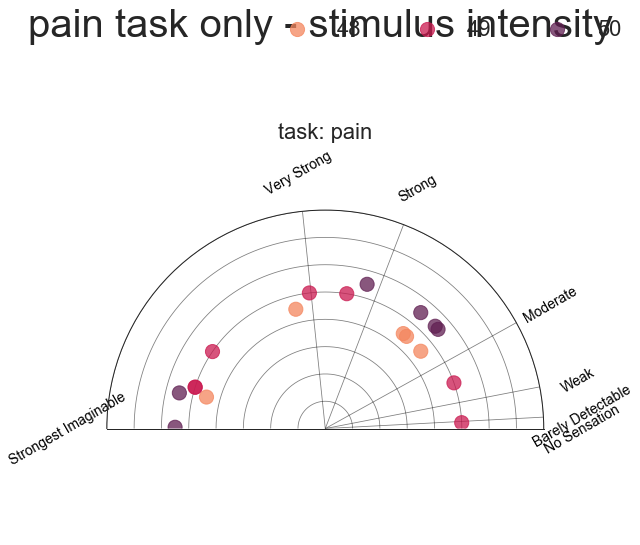

In [188]:
level_r = {50: 1.1, 49:1.0, 48: 0.9}
level_value = {"high_stim": 48, "med_stim":49, "low_stim": 50}

facet_subject_wise_mean(p_result, 
                        'param_task_name', 
                        groupby_subject = 'src_subject_id', 
                        groupby_IV = 'param_stimulus_type',
                        DV = 'event02_expect_angle', 
                        groupby_IV_dict = level_r, 
                        replace_dict = level_value,
                        figure_title = 'pain task only - stimulus intensity')


## load data

In [157]:
sublist = [2,3,4,5,6,7,8,9,10] 
main_dir = '/Users/h/Documents/projects_local/social_influence_analysis/dartmouth/beh_raw'

df = pd.DataFrame()
p_result = pd.DataFrame()

fix_file_list = []
for ind,sub in enumerate(sublist):
    files =  glob.glob(os.path.join(main_dir,'sub-{:04d}'.format(sub),'ses-*','*_task*-pain_beh.csv'))
    fix_file_list.append(files)
flat_list = [item for sub_list in fix_file_list for item in sub_list]

for file in flat_list:
    df = pd.read_csv(file)
    p_result = pd.concat([p_result, df], axis = 0, sort = True)

### filter data

In [15]:
# p_actual_filter = p_result.loc[(p_result['actual_r']>=150) & (p_result['event04_actual_responseonset'] != "NA") ]
p_actual_filter = p_result.loc[p_result['event04_actual_responseonset'] != "NA" ]


/Users/h/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## plot raw form

Text(0.5, 0.8, 'Thermode ratings\n on a semi-circular scale')

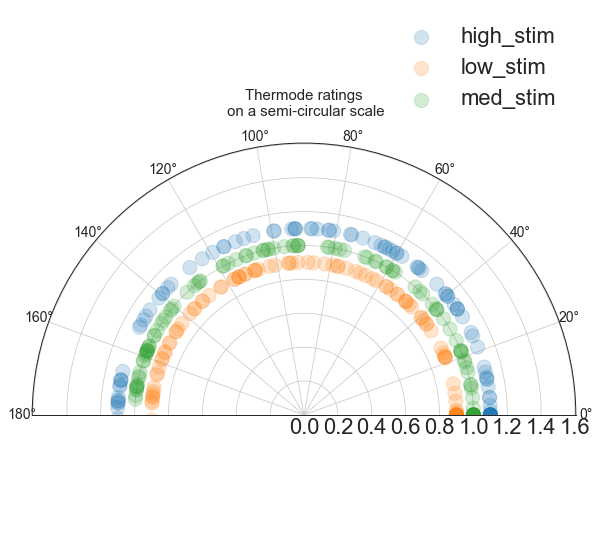

In [46]:


# area = 200 * result['expect_newr']**2
p_result['newr'] = 1
area = 200 * p_result['newr']**2
# r_dist['highstim'] = [9, 10, 11]
groups = p_result.groupby('param_stimulus_type')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
level = {"high_stim": 1.1, "med_stim":1.0, "low_stim": 0.9}

for name, group in groups:
    ax.scatter(group.event02_expect_angle, group.newr*level[name],label=name, alpha=0.20, s=area, marker='o',cmap='hsv')
ax.legend()

figure_title = "Thermode ratings\n on a semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

## plot group mean

## plot per participant

# Actual judgments

In [ ]:
# plot expect facet grid

## plot actual 

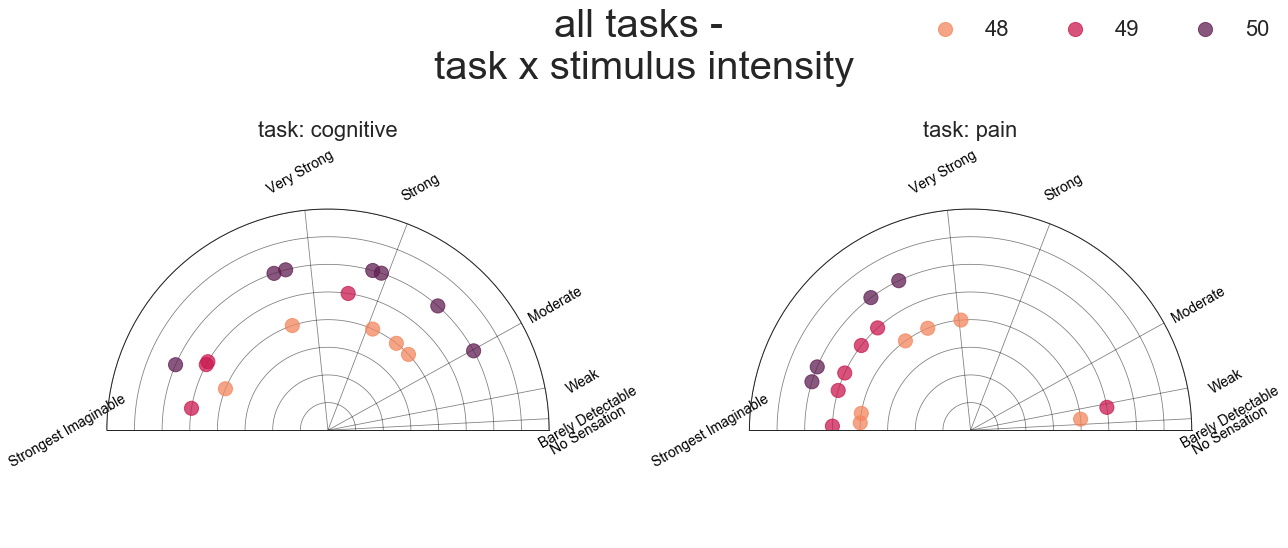

In [190]:
level_r = {50: 1.2, 49:1.0, 48: 0.8}
level_value = {"high_stim": 48, "med_stim":49, "low_stim": 50}

facet_subject_wise_mean(all_task, 
                        'param_task_name', 
                        groupby_subject = 'src_subject_id', 
                        groupby_IV = 'param_stimulus_type',
                        DV = 'event04_actual_angle', 
                        groupby_IV_dict = level_r, 
                        replace_dict = level_value,
                        figure_title = 'all tasks - \ntask x stimulus intensity')
